In [ ]:
!git add

In [ ]:
from datetime import datetime
import pandas as pd
import requests
!pip install matplotlib
!pip install mplfinance
!pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries
#grafico de velas
import mplfinance as mpf
import matplotlib.pyplot as plt
import sqlite3 
import pandas_datareader.data as web
#from datetime import datetime
#limpieza de pantalla
from IPython.display import clear_output
import time
#limpieza de pantalla
clear_output()

 -----------------------------------
 Menú principal. Elija una opción 
 1 = Actualización de datos
 2 = Visualización de datos
  Salir = 3 
-----------------------------------
2
VISUALIZACIÓN DE GRÁFICO
Los ticker guardados son:  ['MF', 'F']

Ingrese el ticker a graficar f
Figure(432x288)


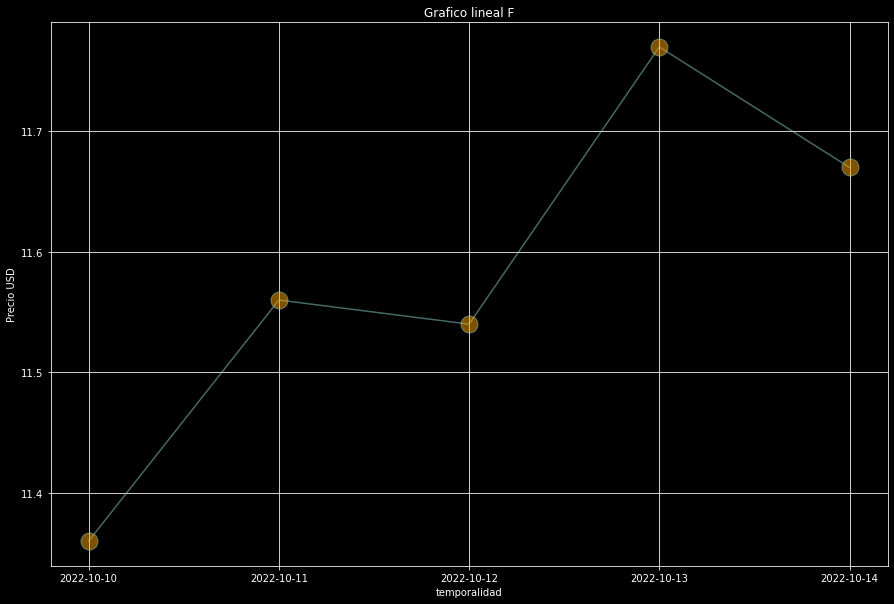

<Figure size 432x288 with 0 Axes>

In [ ]:
from IPython.core.autocall import ExitAutocall
##############VISUALIZACION DE DATOS

key= 'CRH1WRV138EH2EWK'
while True:
  opc =int(input(" -----------------------------------\n Menú principal. Elija una opción \n 1 = Actualización de datos\n 2 = Visualización de datos\n  Salir = 3 \n-----------------------------------\n"))

  if opc == 1:
    print('ACTUALIZACIÓN DE DATOS\n')
    print('Ud. eligió la opción de actualización de datos\n')
    tickers= input('Ingrese ticker a pedir (separacion por espacio sin coma, presione ENTER para finalizar la entrada de datos): ').upper()
    ticker_split = tickers.split()
    print(f'LISTA DE TICKERS INGRESADOS: \n', ticker_split )
    date_start_str = str(input('fecha de inicio (aaaa-mm-dd) : '))
    date_end_str = str(input('fecha final (aaaa-mm-dd) :  '))
    date_start=pd.to_datetime(date_start_str)
    date_end=pd.to_datetime(date_end_str)
    #verificacion de fechas, para posterior consulta y creacion de dataframe
    if  date_start< date_end:
      #creación de base de datos vacia
      myDataFrame = pd.DataFrame() 
      #loop para consultar de forma individual $ p/c ticker, agrega columna con nombre de ticker y unifica df  
      for tickers in ticker_split:
        df_list=web.DataReader(tickers,"av-daily",date_start, date_end, api_key=key)
        df_list.insert(0,'ticker', tickers )
      
        for df in df_list:
          myDataFrame = myDataFrame.append(df_list)
          break
          #creacion de base de datos, donde se guardara el dataframe unificado
      conn = sqlite3.connect('ticker_database')
      c = conn.cursor()

      c.execute('CREATE TABLE IF NOT EXISTS ticker (fecha DATE, apertura NUMBER, alto NUMBER, bajo NUMBER, cierre NUMBER, volumen NUMBER )')
      conn.commit()

      myDataFrame.to_sql('ticker', conn, if_exists='replace', index = True)
      conn.commit() 

      c.execute('''  
          SELECT * FROM ticker
            ''')

      for row in c.fetchall():
        print (row)

      print('Guardando los datos. Aguarde unos instantes, por favor')
      time.sleep(3)  # espera 3 segundos y se borra pantalla
      clear_output()
      print('RESUMEN \n Los tickers guardados en la base de datos son: \n\n')
      for tickers in ticker_split:
        print(tickers, '', date_start, '<->', date_end)

        continue
     
    else:
      print('Entrada de fechas incorrecta. Fecha inicial debe ser anterior que fecha final')
      continue


 ##entrada de ticker para ploteo de gráfica   
  elif opc == 2:
    print('VISUALIZACIÓN DE GRÁFICO')

    print(f'Los ticker guardados son: ', ticker_split )

    ticker_plot_str = input('\nIngrese el ticker a graficar ').upper()
    ticker_gra = myDataFrame.loc[:, 'ticker'] == ticker_plot_str
    #seleccion de fila correspondiente al ticker ingresado
    myDataFrame_ticker = myDataFrame.loc[ticker_gra]
    #plot de ticker
    fig, ax = plt.subplots(figsize=(15,10))
    ax.plot( myDataFrame_ticker['close'], 'o-', ms=17, lw=1.5, alpha=0.5, mfc='orange')
    ax.grid(True)
    ax.set_title('Grafico lineal ' + ticker_plot_str)
    ax.set_xlabel('temporalidad')
    ax.set_ylabel('Precio USD')

    ###

    


    ###

       
    
    print(plt.figure())
    break


  elif opc == 3:
    print('Gracias por utilizar el programa')
    break
  else:
    print('Ud. ingreso una opción inválida')
    continue




# #https://medium.com/@brianmochtyak/pulling-stock-data-with-alpha-vantages-api-d18cf477f41a






In [ ]:
mpf.plot(myDataFrame_ticker,   type = 'renko')


TypeError: ignored

In [ ]:
# test 5; single subplot
plt.plotfile (myDataFrame, ('date', 'open', 'high', 'low', 'close'), subplots=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The plotfile function was deprecated in Matplotlib 3.1 and will be removed in 3.3.



ValueError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
from alpha_vantage.techindicators import TechIndicators
### INDICADORES TECNICOS! PREMIUM????? VEEEER

symbol = input('Ticker : ')
outputsize = 'compact'
interval =input('Interval- 1min,5min,15min,30min,60min,daily,weekly,monthly : ')
time = input('Time Period : ')
tech_indi = input('Technical Indicator- SMA, EMA, VWAP, MACD, Stochastic Oscillator, RSI, Bollinger bands :')

ti = TechIndicators(key,output_format='pandas')

if tech_indi == 'SMA':
  state = ti.get_sma(symbol, interval=interval, time_period=time, series_type='close')[0]
elif tech_indi == 'EMA':
  state = ti.get_ema(symbol, interval=interval, time_period=time, series_type='close')[0]
elif tech_indi == 'VWAP':
  state = ti.get_vwap(symbol, interval=interval)[0]
elif tech_indi == 'MACD':
  state = ti.get_macd(symbol, interval=interval, series_type='close')[0]
elif tech_indi == 'Stochastic Oscillator':
  state = ti.get_stoch(symbol, interval=interval)[0]
elif tech_indi == 'RSI':
  state = ti.get_rsi(symbol, interval=interval, time_period=time, series_type='close')[0]
elif tech_indi == 'Bollinger bands':
  state = ti.get_bbands(symbol, interval=interval, time_period=time, series_type='close')[0]
else:
  print('Wrong Entry')
state

Ticker : f
Interval- 1min,5min,15min,30min,60min,daily,weekly,monthly : daily
Time Period : intraday
Technical Indicator- SMA, EMA, VWAP, MACD, Stochastic Oscillator, RSI, Bollinger bands :EMA


ValueError: ignored

# Nueva sección

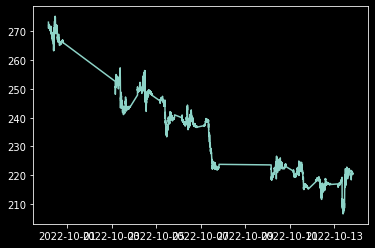

In [ ]:


ts = TimeSeries(key, output_format='pandas')
data, meta = ts.get_intraday('TSLA', interval='1min', outputsize='full')
data.head()
plt.style.use('dark_background')
plt.plot(data['4. close'])



In [ ]:
import pandas as pd
import requests
!pip install matplotlib
!pip install mplfinance
import mplfinance as mf
import json


# Extracting stock data

d
###################VISUALIZACION DE DATOS
##RESUMEN
 #   while True:
    #     interval = int('Ingrese el numero de acuerdo al intervalo: 1= mensual 2= semanal, 3=diario ')
    #   if interval == 1:
    #     state = ts.get_monthly(ticker_upper)[0]
    #     break
    #   elif interval == 2:
    #     state =ts.get_weekly(ticker_upper)[0]
    #     break
    #   elif interval == 3:
    #     state =ts.get_daily(ticker_upper)[0]
    #     break
    #   else:
    #     print('Numero ingresado incorrecto, intente nuevamente ')
    #   continue
    # data = ts.get_state (ticker_upper)
    # data[0]


# Intraday Data API Endpoint






#     df = pd.DataFrame(raw_df['values']).iloc[::-1].set_index('datetime').astype(float)
#     df = df[df.index >= start_date]
#     df.index = pd.to_datetime(df.index)
#     return df

# amzn = get_historical_data('AMZN', '2021-01-01')
# amzn.tail()

# # 1. OHLC Chart

# mf.plot(amzn.iloc[:-50,:])

# # 2. Candlestick Chart

# mf.plot(amzn.iloc[:-50,:], type = 'candle')

# # 3. Renko Chart

# mf.plot(amzn, type = 'renko')

# # 4. Point and Figure Chart

# mf.plot(amzn, type = 'pnf')

# # 5. Technical chart

# mf.plot(amzn, mav = (10, 20), type = 'candle', volume = True)

# # 6. Plot customization

# mf.plot(amzn, mav = (5, 10, 20), type = 'candle', 
#         volume = True, figratio = (10,5), 
#         style = 'binance', title = 'AMZN STOCK PRICE', 
#         tight_layout = True)

# # 7. Saving the plot

# mf.plot(amzn, mav = (5, 10, 20), type = 'candle', 
#         volume = True, figratio = (10,5), 
#         style = 'binance', title = 'AMZN STOCK PRICE', 
#         tight_layout = True, savefig = 'amzn.png')

In [ ]:
#https://tracemycode.com/financial-data-using-alpha-vantage-python/
#VISUALIZACION DE DATOS 3


In [ ]:
#https://youtu.be/F-ef6XO7Rpg
# PARA INFORMAR ESTADO DE SOLICITUD 